In [10]:
from fastai import *
#from fastai.vision import *  # seems it is causing errors 
from fastai.vision.all import * # seems it is causing error Secuentian object has no plot attribute
from fastai.metrics import error_rate
from fastai.vision.data import ImageDataLoaders
import os
import pandas as pd
import numpy as np

In [11]:
#x  = 'Path'
x = 'C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/chest_xray'
path = Path(x)
path.ls()

(#4) [Path('C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/chest_xray/.DS_Store'),Path('C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/chest_xray/test'),Path('C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/chest_xray/train'),Path('C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/chest_xray/val')]

In [14]:
np.random.seed(40)
#data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,ds_tfms=get_transforms(), size=224,num_workers=4).normalize(imagenet_stats)
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2, size=224, num_workers=0, item_tfms=RandomResizedCrop(224, min_scale=0.35), batch_tfms=Normalize.from_stats(*imagenet_stats))

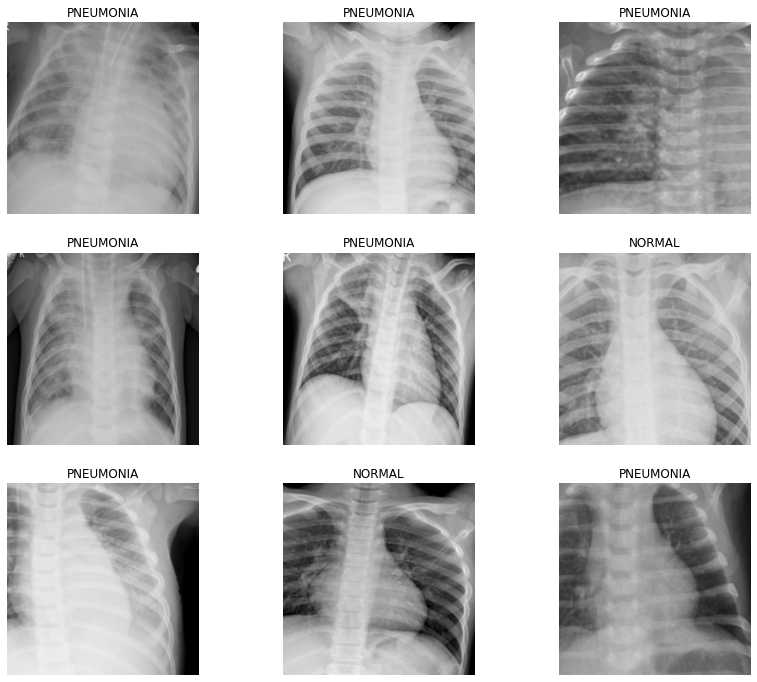

In [15]:
#data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)
data.show_batch(figsize=(14,12))

In [17]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('Path'),path= Path("."))

SuggestedLRs(valley=0.0012022644514217973)

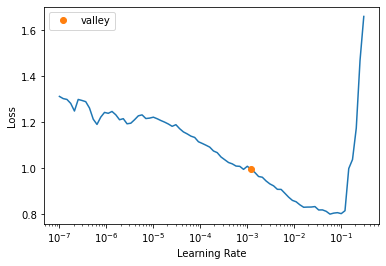

In [18]:
learn.lr_find()
#learn.recorder.plot(suggestions=True)

In [20]:
#learn.recorder.plot(suggestions=True)

In [22]:
#r1 = 1e-3
#r2 = 1e-1
#learn.fit_one_cycle(4,slice(lr1,lr2))

# lr1 = 1e-3
# lr = 1e-1
lr = 0.0012022644514217973
learn.fit_one_cycle(2,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.388209,0.261980,0.923143,1:19:22
1,0.290528,0.191048,0.947054,1:20:11


SuggestedLRs(valley=3.630780702224001e-05)

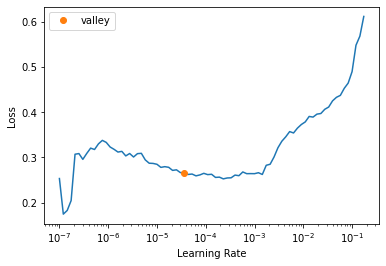

In [23]:
learn.unfreeze()
learn.lr_find()
#learn.recorder.plot()

In [24]:
lr3 = 3.630780702224001e-05
learn.fit_one_cycle(3,slice(lr3,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.271561,0.256109,0.943638,2:02:17
1,0.178839,0.114738,0.954740,1:53:22
2,0.126766,0.092885,0.961571,1:44:09


In [27]:
#learn.recorder.plot_losses()

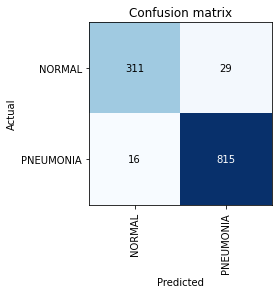

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [70]:
#from fastai.vision import *
directorio = 'C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/val/NORMAL/'
directorio2 = 'C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/val/PNEUMONIA/'
directorio3 = 'C:/Users/mhrec/PythonProjects/PneumoniaDetection/chest_xray/val/OTRAS/'
#img = open_image(directorio + 'NORMAL2-IM-1427-0001.jpeg')
#print(learn.predict(directorio + 'NORMAL2-IM-1427-0001.jpeg')[0])

In [84]:
print(learn.predict(directorio + 'NORMAL2-IM-1427-0001.jpeg')[0])

NORMAL


In [85]:
print(learn.predict(directorio + 'NORMAL2-IM-1430-0001.jpeg')[0])

NORMAL


In [86]:
print(learn.predict(directorio + 'NORMAL2-IM-1431-0001.jpeg')[0])

PNEUMONIA


In [87]:
print(learn.predict(directorio + 'NORMAL2-IM-1436-0001.jpeg')[0])

PNEUMONIA


In [88]:
print(learn.predict(directorio + 'NORMAL2-IM-1437-0001.jpeg')[0])

NORMAL


In [89]:
print(learn.predict(directorio + 'NORMAL2-IM-1438-0001.jpeg')[0])

NORMAL


In [90]:
print(learn.predict(directorio + 'NORMAL2-IM-1440-0001.jpeg')[0])

NORMAL


In [91]:
print(learn.predict(directorio + 'NORMAL2-IM-1442-0001.jpeg')[0])

NORMAL


In [92]:
print(learn.predict(directorio2 + 'person1946_bacteria_4874.jpeg')[0])

PNEUMONIA


In [93]:
print(learn.predict(directorio2 + 'person1946_bacteria_4875.jpeg')[0])

PNEUMONIA


In [94]:
print(learn.predict(directorio2 + 'person1947_bacteria_4876.jpeg')[0])

PNEUMONIA


In [95]:
print(learn.predict(directorio2 + 'person1949_bacteria_4880.jpeg')[0])

PNEUMONIA


In [96]:
print(learn.predict(directorio2 + 'person1950_bacteria_4881.jpeg')[0])

PNEUMONIA


In [97]:
print(learn.predict(directorio2 + 'person1951_bacteria_4882.jpeg')[0])

PNEUMONIA


In [98]:
print(learn.predict(directorio2 + 'person1952_bacteria_4883.jpeg')[0])

PNEUMONIA


In [99]:
print(learn.predict(directorio2 + 'person1954_bacteria_4886.jpeg')[0])

PNEUMONIA


In [100]:
print(learn.predict(directorio3 + 'YANZA_GLORIA_20210916.jpeg')[0])

PNEUMONIA


In [101]:
print(learn.predict(directorio3 + 'OJEDA_MARIA_20210916.jpeg')[0])

PNEUMONIA


In [102]:
print(learn.predict(directorio3 + 'RIVERA_MARIA_20210916.jpeg')[0])

PNEUMONIA


In [103]:
print(learn.predict(directorio3 + 'RIVERA_MARIA_20210916_1.jpeg')[0])

PNEUMONIA


In [104]:
print(learn.predict(directorio3 + 'RENATO_GUERRA_20210916.jpeg')[0])

PNEUMONIA


In [105]:
print(learn.predict(directorio3 + 'OTERO_NARVAEZ_CLAUDIA_PATRICIA_20210916.jpeg')[0])

NORMAL
